In [1]:
#Import Packages
import numpy as np
import os
import pickle
from multicontact_learning_local_objectives.python.machine_learning.ml_utils import *
import matplotlib.pyplot as plt #Matplotlib
import shutil

print("Double check the Path for storing trajectories is correct")

Double check the Path for storing trajectories is correct


In [2]:
#Define Path for Storing Trajectories
#Collect Data Points Path
#workingDirectory = "/home/jiayu/Desktop/multicontact_learning_local_objectives/data/large_slope_flat_patches/"
#workingDirectory = "/media/jiayu/Seagate/Rubbles_Add2Step_Outlier3Sigma/"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles_Standarized_Data/"
workingDirectory = "/media/jiayu/Seagate/Rubbles_Add1Step_1to2StepsbeforeFail_OutlierClip"
#NOTE: need to have "/" at the end
print("Double Check we provide the Correct Traj Path: \n", workingDirectory)

#Define dataset folder
#DataSetPath = workingDirectory + "/DataSet_Large_Standarized"
DataSetPath = workingDirectory + "/DataSet/"

#Path to store ML Model, create one if we dont have
ML_Model_Path = workingDirectory + "/ML_Models/"
if not (os.path.isdir(ML_Model_Path)):
    os.mkdir(ML_Model_Path)


Double Check we provide the Correct Traj Path: 
 /media/jiayu/Seagate/Rubbles_Add1Step_1to2StepsbeforeFail_OutlierClip


In [3]:

#Learning Code
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
#Load DataSet File

# #dataset_file = DataSetPath + "/data_rubbles"+'.p'
# dataset_file = DataSetPath + "TrainingSet_Initial_OriginalForm" + "/data"+'.p'
# dataset = pickle.load(open(dataset_file,"rb"))

#Define Path for Storing Trajectories
#Collect Data Points Path
#workingDirectory = "/home/jiayu/Desktop/multicontact_learning_local_objectives/data/large_slope_flat_patches/"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles_DaggerExact/"
#NOTE: need to have "/" at the end
print("Double Check we provide the Correct Traj Path: \n", workingDirectory)

#Define dataset folder
# TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingSet_Initial",
#                    workingDirectory + "/DataSet/"+"TrainingAug2Steps_1Time_KeepOutlier"]

TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingSet_Initial",
                   workingDirectory + "/DataSet/"+"TrainingAug1Step_1StepbeforeFail_1Time_RemovebyClip",
                   workingDirectory + "/DataSet/"+"TrainingAug1Step_2StepbeforeFail_1Time_RemovebyClip",]

                  

# TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingInitialSet",
#                    workingDirectory + "/DataSet/"+"Dagger_InitSet_1Iter",
#                    workingDirectory + "/DataSet/"+"Dagger_InitSet_2Iter"]
#[workingDirectory + "/DataSet/"+"TrainingInitialSet_NoFirst2",
#                   workingDirectory + "/DataSet/"+"Aug1Time"]
#                    workingDirectory + "/DataSet/"+"TrainingAug2Steps_2Time_RemoveOutlier",
#                    workingDirectory + "/DataSet/"+"TrainingAug2Steps_3Time_RemoveOutlier"]

#For training set
for trainingset_idx in range(len(TrainingSetPath)):
    trainingset_file = TrainingSetPath[trainingset_idx] + "/data"+'.p'
    trainingset = pickle.load(open(trainingset_file,"rb"))
    
    print("For dataset: ", trainingset_idx)
    print("DataSet Sizes: ")
    
    if trainingset_idx == 0:
        x_train = trainingset["input"]
        y_train = trainingset["output"]
    else:
        x_train = np.concatenate((x_train,trainingset["input"]),axis=0)
        y_train = np.concatenate((y_train,trainingset["output"]),axis=0)
    
    print(x_train.shape)
    print(y_train.shape)

    print("World Frame Shift: ", trainingset["Shift_World_Frame_Type"])
    print("Contact Location Representation Type: ",trainingset["Contact_Representation_Type"])
    print("Scaling Factor of Variables: ",trainingset["VectorScaleFactor"])
    print("Number of Preview Steps: ", trainingset["NumPreviewSteps"])
    print("Pre Process Mode: ",trainingset["PreProcessMode"])
    print(" ")

print("Final Data Set Size")
print(x_train.shape)
print(y_train.shape)
print(" ")


Double Check we provide the Correct Traj Path: 
 /media/jiayu/Seagate/Rubbles_Add1Step_1to2StepsbeforeFail_OutlierClip
For dataset:  0
DataSet Sizes: 
(12000, 85)
(12000, 11)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
For dataset:  1
DataSet Sizes: 
(13149, 85)
(13149, 11)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
For dataset:  2
DataSet Sizes: 
(14244, 85)
(14244, 11)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
Final Data Set Size
(14244, 85)
(14244, 11)
 


In [5]:
#Test Train Split, for now No Test data
#x_train, x_test, y_train, y_test = train_test_split(dataset["input"], dataset["output"], test_size = 0.01)
# x_train = dataset["input"]
# y_train = dataset["output"]

#Decide input and outpu dimensionality
d_in = x_train[0].shape[0]
print(d_in)
d_out = y_train[0].shape[0]
print(d_out)

print("Min and Max before filtering")

x_train_max_vec = x_train.max(axis=0)[0:12]
x_train_min_vec = x_train.min(axis=0)[0:12]
print(x_train.max(axis=0)[0:12])
print(x_train.min(axis=0)[0:12])

y_train_max_vec = y_train.max(axis=0)
y_train_min_vec = y_train.min(axis=0)
print(y_train.max(axis=0))
print(y_train.min(axis=0))

85
11
Min and Max before filtering
[0.0677694  0.24991413 0.8        0.39847362 0.3957305  0.11244715
 0.21541167 0.09249112 0.10060295 0.         0.62697375 0.19475536]
[-0.32660741 -0.25669196  0.59999989  0.         -0.40666545 -0.1421139
 -0.29679423 -0.2459865  -0.07474384 -0.33226829 -0.62035719 -0.19532383]
[0.33627582 0.28044238 0.80000002 0.39847362 0.40761054 0.16553658
 0.21262392 0.10202533 0.09839909 0.81250858 0.94114879]
[-0.02961811 -0.27982536  0.59999924  0.09903459 -0.41722107 -0.10510261
 -0.29679423 -0.2459865  -0.11635915  0.18958942  0.05882772]


In [6]:
x_train_sort = np.sort(np.absolute(y_train[:,6]))
print(x_train_sort[-100:])

[0.08930405 0.09089276 0.09288619 0.09763671 0.09953605 0.10029736
 0.1016125  0.1029234  0.10363308 0.10474584 0.10545334 0.10569776
 0.1060302  0.10620729 0.1062311  0.10623967 0.10661126 0.10725842
 0.10775549 0.10934522 0.10993023 0.11023951 0.11333367 0.1159446
 0.11712642 0.11735726 0.12444802 0.1249204  0.12564211 0.12599456
 0.12749217 0.12931565 0.12959261 0.13081137 0.13326385 0.13524994
 0.13533123 0.13735204 0.1376696  0.14181771 0.14210193 0.14666805
 0.14689037 0.14830251 0.14855809 0.14904606 0.15001562 0.1505194
 0.15098382 0.15318601 0.15414519 0.16150264 0.16155981 0.16253706
 0.16399183 0.16468682 0.16469864 0.16667077 0.1668425  0.16722909
 0.16791981 0.1688278  0.17034961 0.17093978 0.17149059 0.17269114
 0.17344287 0.1737607  0.17441313 0.1745228  0.17490892 0.17497894
 0.17563548 0.17574092 0.17787871 0.17988796 0.18078207 0.1819061
 0.18360429 0.18403182 0.18516771 0.1862044  0.18621224 0.18730456
 0.18773559 0.18822198 0.18952198 0.19312925 0.19506221 0.1976091

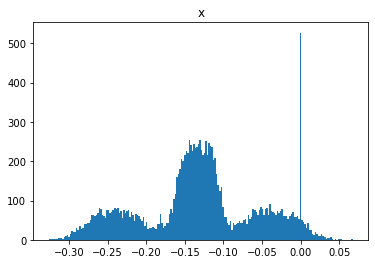

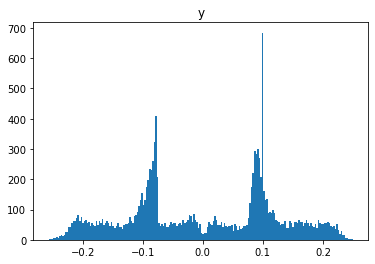

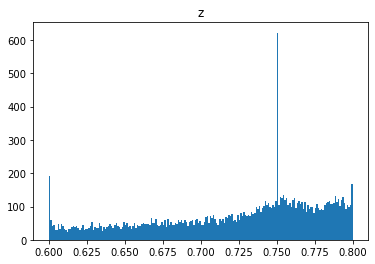

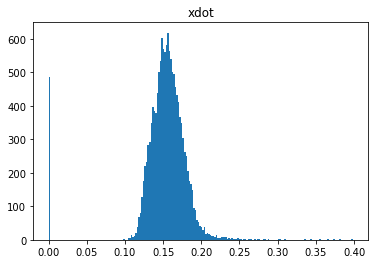

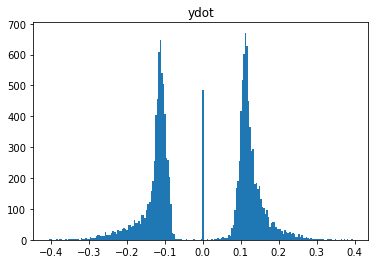

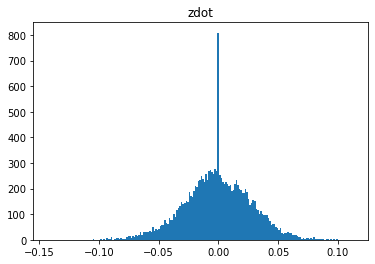

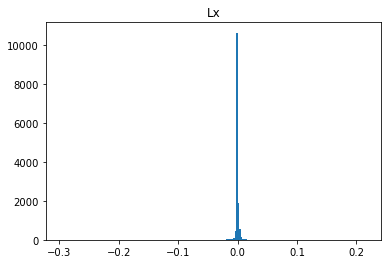

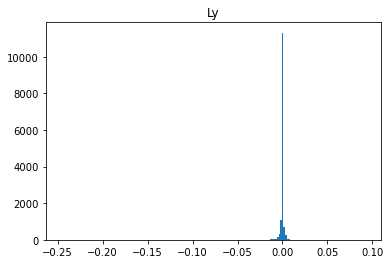

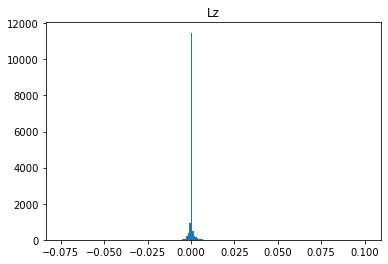

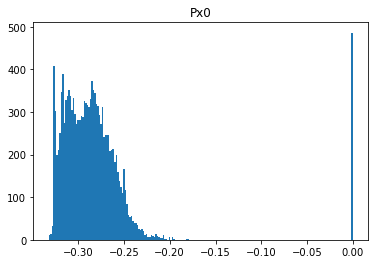

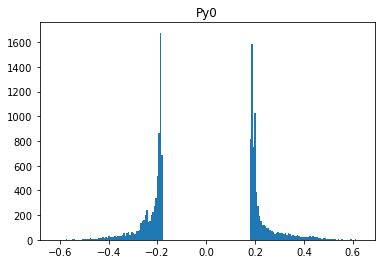

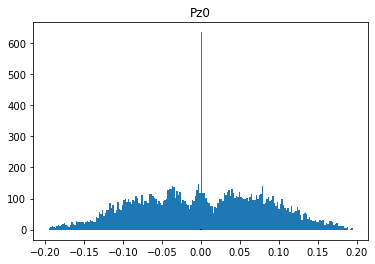

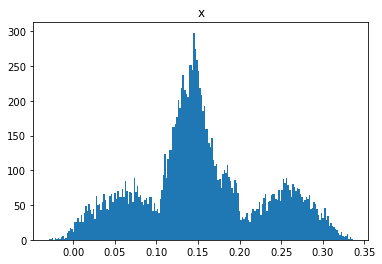

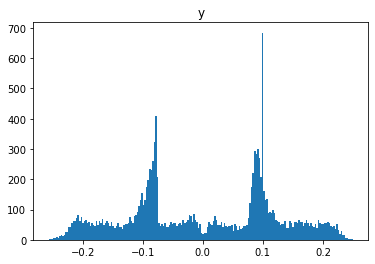

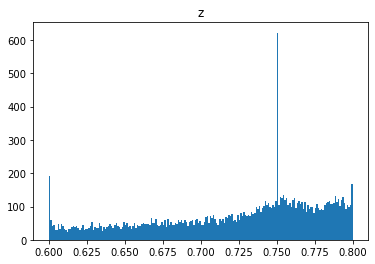

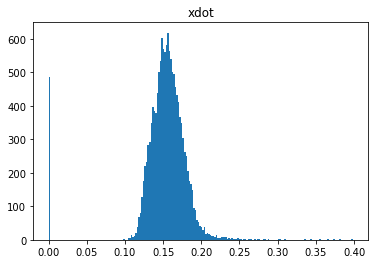

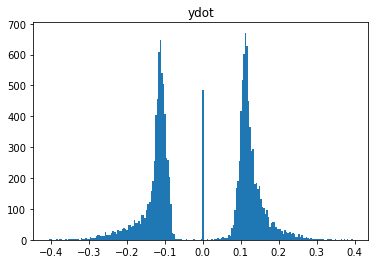

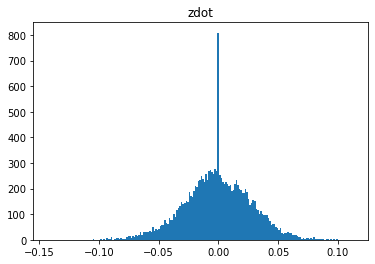

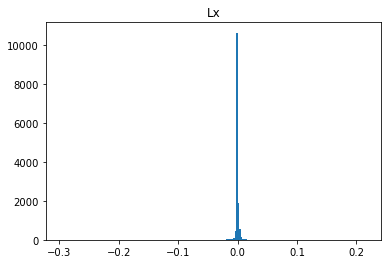

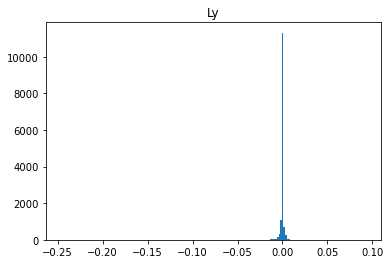

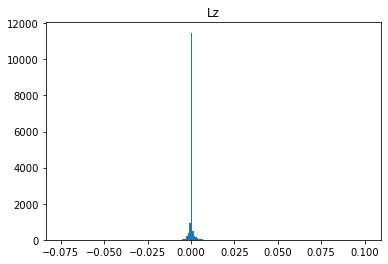

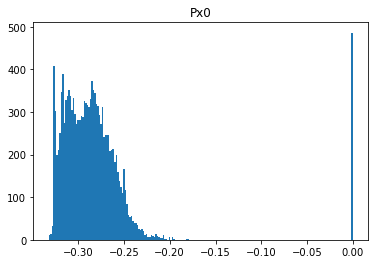

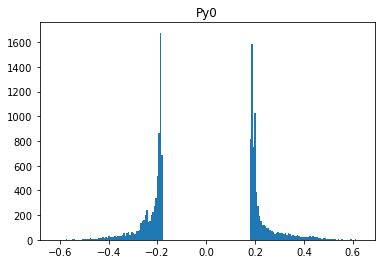

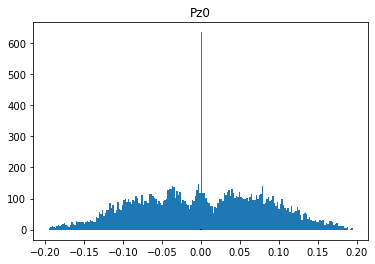

In [7]:

binnum = 200

plt.hist(x_train[:,0], bins=binnum, density = False)
plt.title("x")
plt.show()
plt.hist(x_train[:,1], bins=binnum, density = False)
plt.title("y")
plt.show()
plt.hist(x_train[:,2], bins=binnum, density = False)
plt.title("z")
plt.show()

plt.hist(x_train[:,3], bins=binnum, density = False)
plt.title("xdot")
plt.show()
plt.hist(x_train[:,4], bins=binnum, density = False)
plt.title("ydot")
plt.show()
plt.hist(x_train[:,5], bins=binnum, density = False)
plt.title("zdot")
plt.show()

plt.hist(x_train[:,6], bins=binnum, density = False)
plt.title("Lx")
plt.show()
plt.hist(x_train[:,7], bins=binnum, density = False)
plt.title("Ly")
plt.show()
plt.hist(x_train[:,8], bins=binnum, density = False)
plt.title("Lz")
plt.show()

plt.hist(x_train[:,9], bins=binnum, density = False)
plt.title("Px0")
plt.show()
plt.hist(x_train[:,10], bins=binnum, density = False)
plt.title("Py0")
plt.show()
plt.hist(x_train[:,11], bins=binnum, density = False)
plt.title("Pz0")
plt.vlines(0,-1,1)
plt.show()


plt.hist(y_train[:,0], bins=binnum, density = False)
plt.title("x")
plt.show()
plt.hist(x_train[:,1], bins=binnum, density = False)
plt.title("y")
plt.show()
plt.hist(x_train[:,2], bins=binnum, density = False)
plt.title("z")
plt.show()

plt.hist(x_train[:,3], bins=binnum, density = False)
plt.title("xdot")
plt.show()
plt.hist(x_train[:,4], bins=binnum, density = False)
plt.title("ydot")
plt.show()
plt.hist(x_train[:,5], bins=binnum, density = False)
plt.title("zdot")
plt.show()

plt.hist(x_train[:,6], bins=binnum, density = False)
plt.title("Lx")
plt.show()
plt.hist(x_train[:,7], bins=binnum, density = False)
plt.title("Ly")
plt.show()
plt.hist(x_train[:,8], bins=binnum, density = False)
plt.title("Lz")
plt.show()

plt.hist(x_train[:,9], bins=binnum, density = False)
plt.title("Px0")
plt.show()
plt.hist(x_train[:,10], bins=binnum, density = False)
plt.title("Py0")
plt.show()
plt.hist(x_train[:,11], bins=binnum, density = False)
plt.title("Pz0")
plt.vlines(0,-1,1)
plt.show()

(12, 12)
(12,)
[0.00000000e+000 8.94937841e-159 7.59034873e-155 4.24349900e-144
 8.78556263e-116 2.45177913e-111 1.42741153e-109 1.19504599e-103
 2.61634427e-092 3.70646465e-057 8.12233635e-044 3.22766362e-043
 2.48952307e-025 5.23506199e-025 1.13996990e-024 1.02070418e-023
 3.03495434e-022 1.16210468e-020 2.74895012e-016 1.85781707e-010
 3.02837509e-007 3.02837509e-007 3.02837509e-007 3.02837509e-007
 3.02837509e-007 3.02837509e-007 3.02837509e-007 3.02837509e-007
 3.02837509e-007 3.02837509e-007 3.02837509e-007 3.02837509e-007
 3.02837509e-007 3.02837509e-007 3.02837509e-007 3.02837509e-007
 3.02837509e-007 2.38954477e-005 6.28210458e-005 1.10141738e-004
 3.51426393e-004 8.10324841e-003 1.79943678e-002 5.01284540e-002
 1.03574924e-001 1.64235382e-001 2.42998859e-001 2.57191014e+001
 2.70734620e+001 2.76749146e+001 4.01997846e+002 6.53418337e+002
 2.75897655e+003 4.34826179e+003 4.35433188e+003 1.91686882e+004
 2.74911039e+004 3.03102717e+004 3.95001790e+004 4.72147514e+004]


NameError: name 'mean_x_train' is not defined

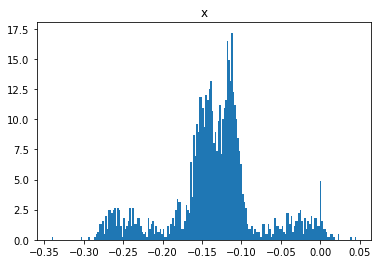

In [11]:
#Gaussian Filtering

from scipy.stats import multivariate_normal

covariance_matrix = np.cov(x_train[:,:12].T)
print(covariance_matrix.shape)
mean_input = np.mean(x_train[:,:12], axis = 0)
print(mean_input.shape)

model = multivariate_normal(cov=covariance_matrix,mean=mean_input)

pdfs = model.pdf(x_train[:,:12])
pdfs_sorted = np.sort(pdfs)

print(pdfs_sorted[:60])

plt.hist(x_train[:,0], bins=binnum, density = True)
plt.title("x")
idx=0
plt.vlines(mean_x_train[idx]-3*std_x_train[idx],-1,1)
plt.vlines(mean_x_train[idx]+3*std_x_train[idx],-1,1)
plt.show()

plt.hist(x_train[:,1], bins=binnum, density = True)
plt.title("y")
idx=1
plt.vlines(mean_x_train[idx]-3*std_x_train[idx],-1,1)
plt.vlines(mean_x_train[idx]+3*std_x_train[idx],-1,1)
plt.show()

plt.hist(x_train[:,2], bins=binnum, density = True)
plt.title("z")
idx=2
plt.vlines(mean_x_train[idx]-3*std_x_train[idx],-1,1)
plt.vlines(mean_x_train[idx]+3*std_x_train[idx],-1,1)
plt.show()

plt.hist(x_train[:,3], bins=binnum, density = True)
plt.title("xdot")
idx=3
plt.vlines(mean_x_train[idx]-3*std_x_train[idx],-1,1)
plt.vlines(mean_x_train[idx]+3*std_x_train[idx],-1,1)
plt.show()

plt.hist(x_train[:,4], bins=binnum, density = True)
plt.title("ydot")
idx=4
plt.vlines(mean_x_train[idx]-3*std_x_train[idx],-1,1)
plt.vlines(mean_x_train[idx]+3*std_x_train[idx],-1,1)
plt.show()

plt.hist(x_train[:,5], bins=binnum, density = True)
plt.title("zdot")
idx=5
plt.vlines(mean_x_train[idx]-3*std_x_train[idx],-1,1)
plt.vlines(mean_x_train[idx]+3*std_x_train[idx],-1,1)
plt.show()

plt.hist(x_train[:,6], bins=binnum, density = True)
plt.title("Lx")
idx=6
plt.vlines(mean_x_train[idx]-3*std_x_train[idx],-1,1)
plt.vlines(mean_x_train[idx]+3*std_x_train[idx],-1,1)
plt.show()

plt.hist(x_train[:,7], bins=binnum, density = True)
plt.title("Ly")
idx=7
plt.vlines(mean_x_train[idx]-3*std_x_train[idx],-1,1)
plt.vlines(mean_x_train[idx]+3*std_x_train[idx],-1,1)
plt.show()

plt.hist(x_train[:,8], bins=binnum, density = True)
plt.title("Lz")
idx=8
plt.vlines(mean_x_train[idx]-3*std_x_train[idx],-1,1)
plt.vlines(mean_x_train[idx]+3*std_x_train[idx],-1,1)
plt.show()

plt.hist(x_train[:,9], bins=binnum, density = True)
plt.title("Px0")
idx=9
plt.vlines(mean_x_train[idx]-3*std_x_train[idx],-1,1)
plt.vlines(mean_x_train[idx]+3*std_x_train[idx],-1,1)
plt.show()

plt.hist(x_train[:,10], bins=binnum, density = True)
plt.title("Py0")
idx=10
plt.vlines(mean_x_train[idx]-3*std_x_train[idx],-1,1)
plt.vlines(mean_x_train[idx]+3*std_x_train[idx],-1,1)
plt.show()

plt.hist(x_train[:,11], bins=binnum, density = True)
plt.title("Pz0")
idx=11
plt.vlines(mean_x_train[idx]-3*std_x_train[idx],-1,1)
plt.vlines(mean_x_train[idx]+3*std_x_train[idx],-1,1)
plt.show()

In [14]:
#Filter training dataset
outlier_Idx = []
for data_idx in range(x_train.shape[0]):
    print(data_idx, "data:")
    dataTemp = x_train[data_idx]
    outlierflag = False
    for axis_num in range(12):
        if dataTemp[axis_num] > mean_x_train[axis_num] + 3*std_x_train[axis_num] or dataTemp[axis_num] < mean_x_train[axis_num] - 3*std_x_train[axis_num]:
            print("axis ", axis_num, "outlier")
            outlierflag = True
    if outlierflag == True:
        outlier_Idx.append(data_idx)
print(len(outlier_Idx))

0 data:
axis  5 outlier
1 data:
2 data:
3 data:
4 data:
5 data:
6 data:
7 data:
8 data:
9 data:
10 data:
11 data:
12 data:
13 data:
14 data:
15 data:
16 data:
17 data:
18 data:
19 data:
20 data:
21 data:
22 data:
23 data:
24 data:
25 data:
26 data:
27 data:
28 data:
29 data:
30 data:
31 data:
32 data:
33 data:
34 data:
35 data:
36 data:
37 data:
axis  3 outlier
38 data:
39 data:
40 data:
41 data:
42 data:
43 data:
44 data:
45 data:
46 data:
47 data:
48 data:
49 data:
50 data:
51 data:
52 data:
53 data:
54 data:
55 data:
56 data:
57 data:
58 data:
59 data:
60 data:
61 data:
62 data:
63 data:
64 data:
65 data:
66 data:
67 data:
68 data:
69 data:
70 data:
71 data:
72 data:
73 data:
74 data:
75 data:
76 data:
77 data:
78 data:
79 data:
80 data:
81 data:
82 data:
83 data:
84 data:
85 data:
86 data:
87 data:
88 data:
89 data:
90 data:
91 data:
92 data:
93 data:
94 data:
95 data:
96 data:
97 data:
98 data:
99 data:
100 data:
101 data:
102 data:
103 data:
104 data:
105 data:
106 data:
axis  3 

1512 data:
1513 data:
1514 data:
1515 data:
1516 data:
axis  3 outlier
axis  9 outlier
1517 data:
1518 data:
1519 data:
1520 data:
1521 data:
1522 data:
1523 data:
1524 data:
1525 data:
1526 data:
1527 data:
1528 data:
1529 data:
1530 data:
1531 data:
1532 data:
1533 data:
1534 data:
1535 data:
1536 data:
1537 data:
1538 data:
1539 data:
1540 data:
1541 data:
1542 data:
1543 data:
1544 data:
1545 data:
1546 data:
1547 data:
1548 data:
1549 data:
1550 data:
1551 data:
1552 data:
1553 data:
1554 data:
1555 data:
1556 data:
1557 data:
1558 data:
1559 data:
1560 data:
1561 data:
1562 data:
1563 data:
1564 data:
1565 data:
1566 data:
1567 data:
1568 data:
1569 data:
1570 data:
1571 data:
1572 data:
1573 data:
1574 data:
1575 data:
1576 data:
1577 data:
1578 data:
1579 data:
1580 data:
1581 data:
1582 data:
1583 data:
1584 data:
1585 data:
1586 data:
1587 data:
1588 data:
1589 data:
1590 data:
1591 data:
1592 data:
1593 data:
1594 data:
1595 data:
1596 data:
1597 data:
1598 data:
1599 data:
